# PW4 - Linear Regression

## Imports

In [34]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


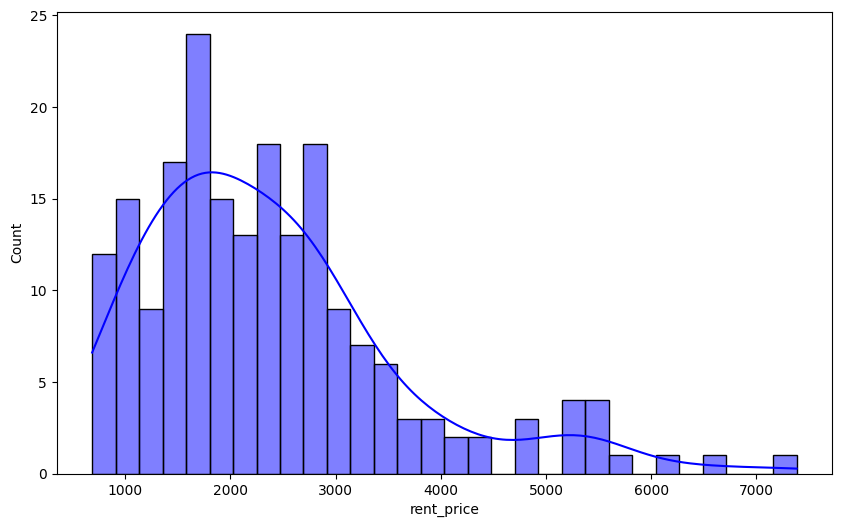

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['rent_price'], kde=True, color='blue', bins=30)
plt.show()

b) Plot a histogram to visualize the distribution of the living area

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='living_area', ylabel='Count'>

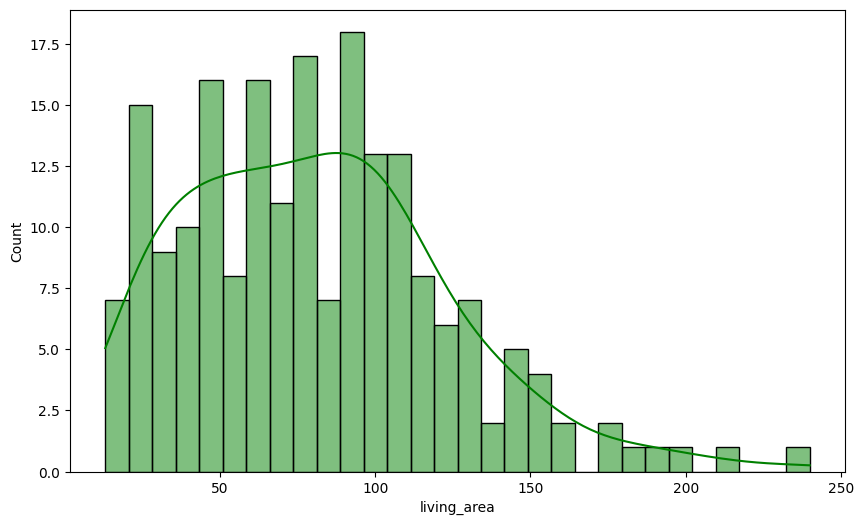

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['living_area'], kde=True, color='green', bins=30)

c) Plot a scatter plot of renting price as a function of living area

c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magal\anaconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


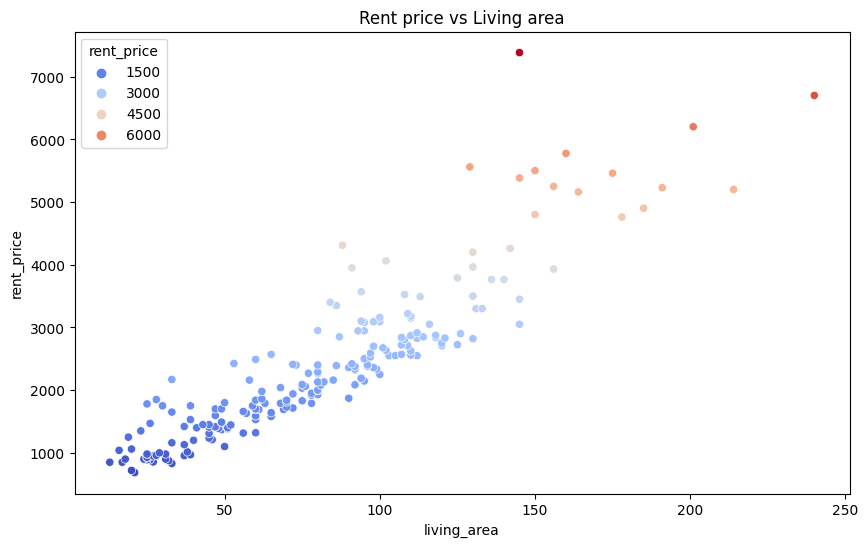

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_area', y='rent_price', data=dataset, hue='rent_price', palette='coolwarm')
plt.title('Rent price vs Living area')
plt.show()

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

In [23]:
x = dataset['living_area'].values
y = dataset['rent_price'].values

thetas = np.polyfit(x, y, 1)
print(thetas)

h = np.poly1d(thetas)

[ 26.33242457 240.07710727]


In [ ]:
# self implement version
"""
ones = np.ones((len(df),1))
living_area = df['living_area'].to_numpy().reshape(-1,1)
y = df['rent_price'].to_numpy().reshape(-1,1)
X = np.concatenate((ones,living_area), axis=1)

theta = inv(X.T.dot(X)).dot(X.T).dot(y)
theta
"""

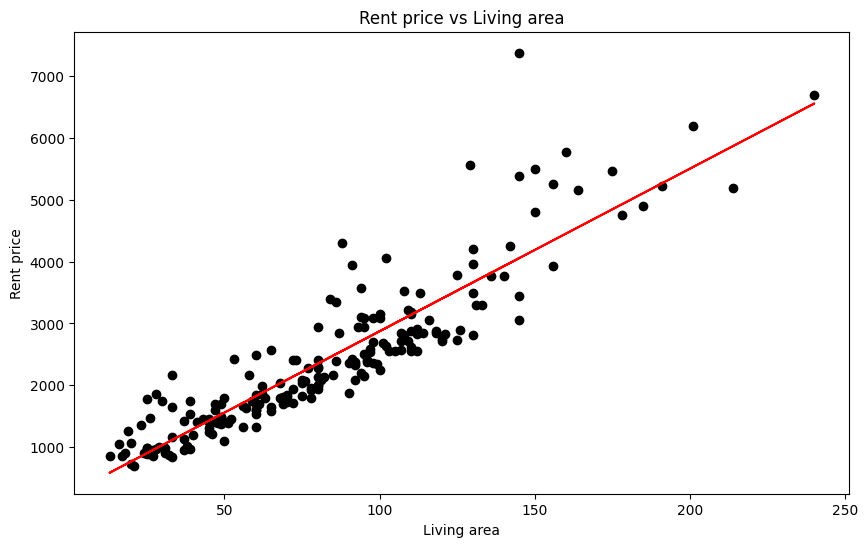

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black')
plt.plot(x, h(x), color='red')
plt.title('Rent price vs Living area')
plt.xlabel('Living area')
plt.ylabel('Rent price')
plt.show()

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [25]:
# compute cost by mse
def compute_cost(x, y, theta):
    m = len(x)
    h = np.poly1d(theta)
    return (1/(2*m)) * np.sum(np.square(h(x) - y))

print(compute_cost(x, y, thetas))

138034.95779787414


## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [28]:
def gradient_descent(x, y, theta, alpha, iterations):
   """
   x: array of x values
   y: array of y values
   theta: array of theta values
   alpha: learning rate
   iterations: number of iterations
   """
   m = len(x)
   cost_history = np.zeros(iterations)
   theta_history = np.zeros((iterations, 2))
   for it in range(iterations):
       h = np.poly1d(theta)
       theta = theta - (alpha/m) * np.sum((h(x) - y) * x)
       theta_history[it, :] = theta.T
       cost_history[it] = compute_cost(x, y, theta)
   return theta, cost_history, theta_history

In [37]:
# initialize theta and run gradient descent
theta = np.zeros(2)
iterations = 100
alpha = 0.00001

theta, cost_history, theta_history = gradient_descent(x, y, theta, alpha, iterations)

print(theta)

[28.37984767 28.37984767]


a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

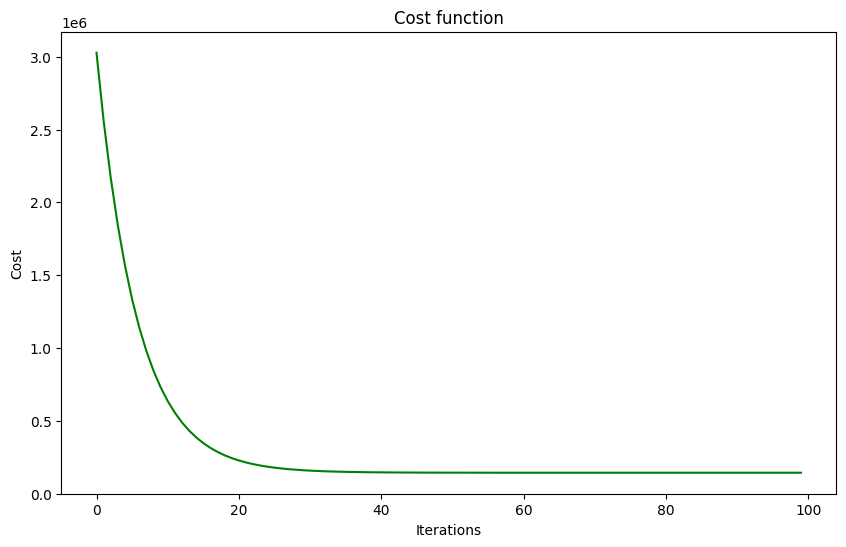

In [39]:
plt.figure(figsize=(10, 6))
itera = np.arange(iterations)
plt.plot(itera, cost_history, 'g')
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

We can observe that 100 iterations are too much for this problem. The cost value converges after 25 iterations. The more the learning rate is augmented, the more the cost value converges quickly.

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

We could stop iterating when the cost value converges. We could define a threshold and stop iterating when the cost value is below this threshold.

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

In [42]:
h = np.poly1d(theta)
theta

array([28.37984767, 28.37984767])

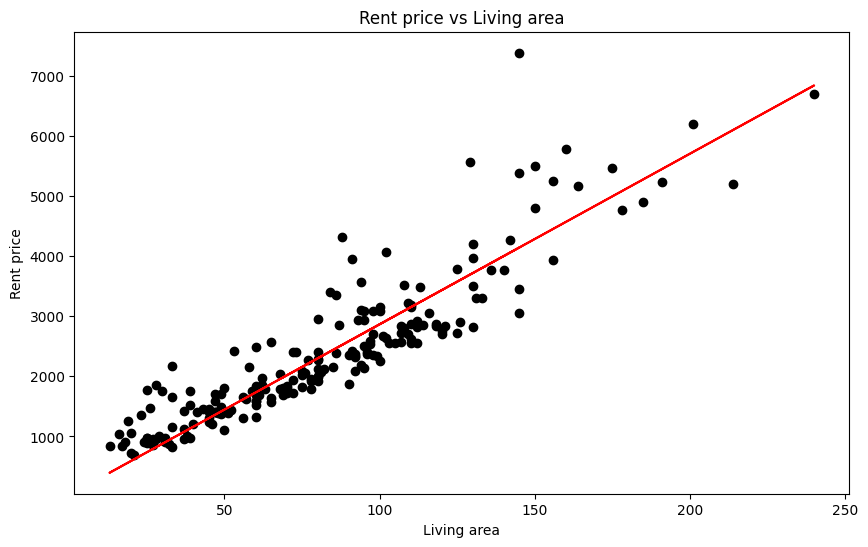

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black')
plt.plot(x, h(x), color='red')
plt.title('Rent price vs Living area')
plt.xlabel('Living area')
plt.ylabel('Rent price')
plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [41]:
# compute cost by mse
print(compute_cost(x, y, theta))

142809.9997349033


The cost value computed by mse is higher with gradient descent than with the closed form solution. It is normal because the closed form solution is the optimal solution.

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

In [43]:
def gradient_descent_batch(x, y, theta, alpha, iterations, batch_size):
   """
   x: array of x values
   y: array of y values
   theta: array of theta values
   alpha: learning rate
   iterations: number of iterations
   batch_size: batch size
   """
   m = len(x)
   cost_history = np.zeros(iterations)
   theta_history = np.zeros((iterations, 2))
   for it in range(iterations):
       cost = 0.0
       indices = np.random.permutation(m)
       x = x[indices]
       y = y[indices]
       for i in range(0, m, batch_size):
           xi = x[i:i+batch_size]
           yi = y[i:i+batch_size]
           h = np.poly1d(theta)
           theta = theta - (alpha/m) * np.sum((h(xi) - yi) * xi)
           cost += compute_cost(xi, yi, theta)
       cost_history[it] = cost
       theta_history[it, :] = theta.T
   return theta, cost_history, theta_history

In [44]:
theta = np.zeros(2)
iterations = 100
alpha = 0.00001
batch_size = 10

theta, cost_history, theta_history = gradient_descent_batch(x, y, theta, alpha, iterations, batch_size)

print(theta)

[28.38066091 28.38066091]


a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

In [48]:
h = np.poly1d(theta)

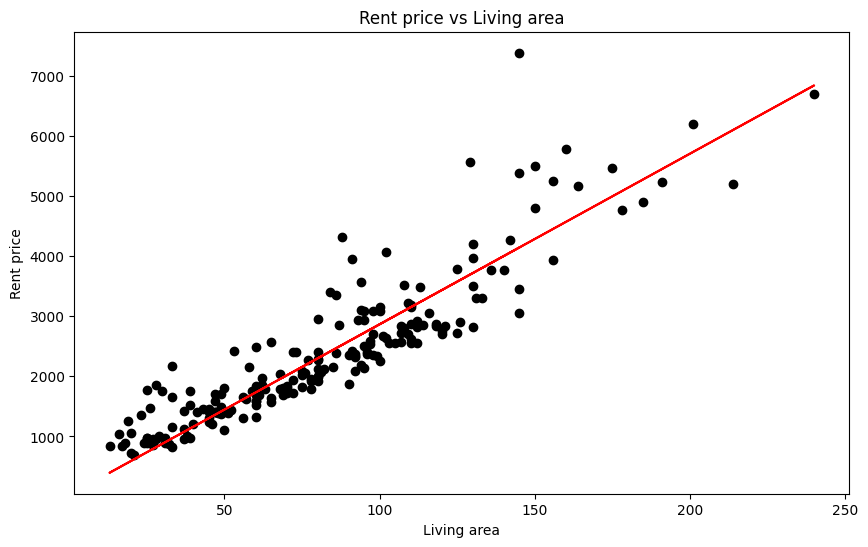

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black')
plt.plot(x, h(x), color='red')
plt.title('Rent price vs Living area') 
plt.xlabel('Living area')
plt.ylabel('Rent price')
plt.show()

b) How many samples do you need to visit for reaching the convergence?

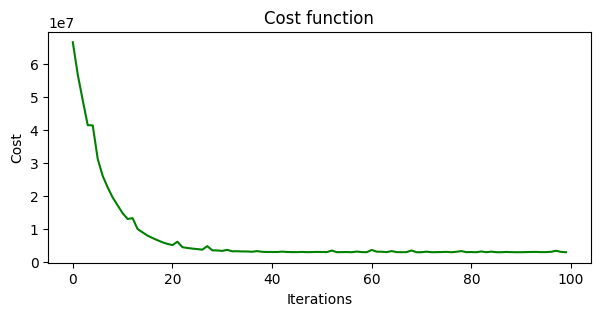

In [50]:
# Your code here
plt.figure(figsize=(7, 3))
itera = np.arange(iterations)
plt.plot(itera, cost_history, 'g')
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

We can observe that after 30 iterations, the cost value converges. We need to visit 30 samples for reaching the convergence with a batch size of 10.

c) What kind of stopping criterion could we use here?

We could stop iterating when the cost value converges. We could define a threshold and stop iterating when the cost value is below this threshold.

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [52]:
print(compute_cost(x, y, theta))

142809.93729959452


The cost value computed by mse is higher with stochastic gradient descent than with the closed form solution.  The cost value is a little bit lower with stochastic gradient descent than with the full batch gradient descent. We can conclude that the stochastic gradient descent is a good compromise between the full batch gradient descent and the closed form solution.

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

We would prefer a gradient descent algorithm to compute the regression model when the number of features is high. Indeed, the closed form solution is very expensive to compute when the number of features is high.

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

The impact of an outlier in the stochastic gradient descent process is that the cost value will be higher. If we have many outliers, the cost value will be even higher. The mse function is very sensible to outliers as it is a quadratic function.

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

If the learning rate is too large, the cost value will diverge. If the learning rate is too small, the cost value will converge very slowly. We could use a learning rate that decreases over time. 

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

We could add a new feature $x_{d+1}$ that is equal to $x_{d}^{2}$. We could also add a new feature $x_{d+2}$ that is equal to $x_{d}^{3}$. We need to take precautions in terms of numerical stability because the values of $x_{d}^{2}$ and $x_{d}^{3}$ can be very high.

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

Idk